# Setup

Look nice plotting:

In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

science libraries (using autograd instead of tensorflow for easy prototyping)

In [18]:
import autograd.numpy as np
import autograd.scipy as sp
from autograd import grad
from autograd.util import flatten_func
import librosa
from importlib import reload
from librosa.display import specshow


# Doing things

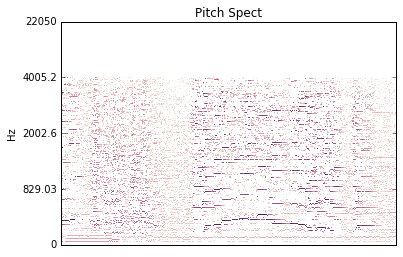

In [27]:
import src.danscriptors.analysis as analysis
analysis = reload(analysis)
features = analysis.harmonic_index('samples/clarinet.mp3', debug=True, cached=False)

In [28]:
features

{'H_pitch': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 'H_pitch_amp': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 'metadata': {'args': {'analysis': 'harmonic_index',
   'duration': 120.0,
   'high_pass_f': 40.0,
   'hop_length': 1024,
   'low_pass_f': 4000.0,
   'n_fft': 4096,
   'n_pitches': 16,
   'offset': 0.0,
   'pitch_floor': -60,
   'pitch_median': 20},
  'dur': 42.8930612244898,
  'harmonicfile': '/Users/dan/Source/mlmistrels/samples/clarinet___nGorjw.harmonic.wav',
  'key

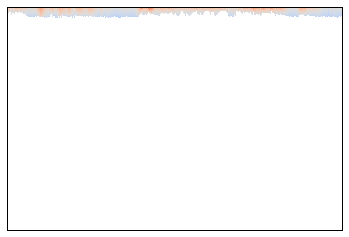

In [32]:
specshow(np.sort(np.log(features['H_pitch_amp']), axis=0));

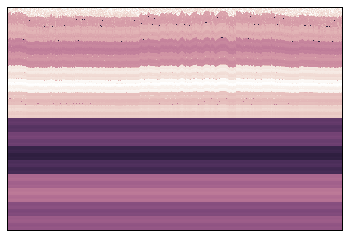

In [66]:
specshow(np.argsort(features['H_pitch_amp'], axis=0));

In [59]:
H_pitch_amp, H_pitch = features['H_pitch_amp'], features['H_pitch']
H_pitch_amp.shape

(2049, 1848)

In [69]:
#H_pitch_sort = np.apply_along_axis(np.argsort, axis=0, arr=H_pitch_amp)
H_pitch_sort = np.argsort(H_pitch_amp, axis=1)
H_top_sort = H_pitch_sort[0:16,:]


array([[   0, 1238, 1237, ...,  608,  606, 1847],
       [   0, 1238, 1237, ...,  608,  606, 1847],
       [   0, 1238, 1237, ...,  608,  606, 1847],
       ..., 
       [   0, 1196, 1195, ...,  467,  472,  464],
       [   0, 1210, 1209, ...,  448,  242,  241],
       [   0, 1137, 1136, ...,  416,  309,  308]])

In [74]:
H_pitch[H_top_sort, 0:H_pitch_amp.shape[1]].shape

(16, 1848, 1848)

In [45]:
H_pitch_amp[H_pitch_sort]

KeyboardInterrupt: 

In [ ]:
np.argsort?

In [61]:
H_pitch_sort

array([[   0,    0,    0, ...,    0,    0,    0],
       [1373, 1373, 1373, ..., 1373, 1373, 1373],
       [1372, 1372, 1372, ..., 1372, 1372, 1372],
       ..., 
       [ 322,   92,   92, ...,  241,  102,   49],
       [ 179,  154,  154, ...,  109,   43,   42],
       [   4,   30,   31, ...,    9,  109,  102]])